In [1]:
## BEGIN PREAMBLE
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Vince/Google Drive/2nd Year/T3/DATAENG/TEP/dataeng_tep.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data cleaning and descriptive statistics

## Create Additional Columns
In this block, we add the total weight and component percentage columns

In [2]:
df['totalweight']=df['cement']+df['slag']+df['flyash']+df['water']+df['superplasticizer']+df['coarseaggregate']+df['fineaggregate']

#create colum for percentage of each component
df['cement_pct']=df['cement']/df['totalweight']*100
df['slag_pct']=df['slag']/df['totalweight']*100
df['flyash_pct']=df['flyash']/df['totalweight']*100
df['water_pct']=df['water']/df['totalweight']*100
df['splasticizer_pct']=df['superplasticizer']/df['totalweight']*100
df['coarse_agg_pct']=df['coarseaggregate']/df['totalweight']*100
df['fine_agg_pct']=df['fineaggregate']/df['totalweight']*100

In [3]:
df.head() #displays the first 5 rows to check if the added columns are correct

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,totalweight,cement_pct,slag_pct,flyash_pct,water_pct,splasticizer_pct,coarse_agg_pct,fine_agg_pct
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,2420.5,22.309440,0.000000,0.0,6.692832,0.103284,42.966329,27.928114
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,2435.5,22.172039,0.000000,0.0,6.651612,0.102648,43.317594,27.756108
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,2229.0,14.917003,6.393001,0.0,10.228802,0.000000,41.812472,26.648721
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,2229.0,14.917003,6.393001,0.0,10.228802,0.000000,41.812472,26.648721
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,2326.9,8.534961,5.689974,0.0,8.251322,0.000000,42.047359,35.476385


## Display the descriptive statistics for the whole dataframe 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895825,86.279342,0.000000,0.000000,22.000000,142.950000,359.400000
flyash,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300000,200.100000
water,1030.0,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200000
coarseaggregate,1030.0,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineaggregate,1030.0,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
csMPa,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000
totalweight,1030.0,2343.523398,65.365356,2194.600000,2291.150000,2349.100000,2390.400000,2551.000000


Take note of components with a minimum of 0. This may imply that these components are not really necessary in creating concrete and may be considered inessential. 

# Exploratory Data Analysis

## Plot the weight distribution of the samples; 
Note that a cu.m of concrete (m^3) is 2.5 tons or 2,500 kg

## Compare the distribution of each concrete component

Text(0.5, 1.0, 'Comparison of Concrete Components by Mass')

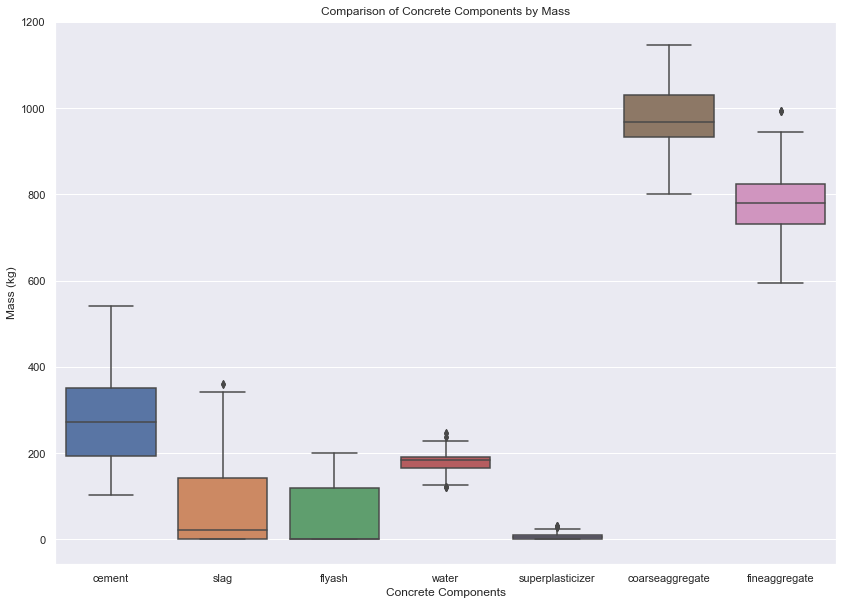

In [5]:
plt.figure(figsize=(14,10))
sns.set()
sns.boxplot(data=df.iloc[:,0:7])
plt.ylabel('Mass (kg)')
plt.xlabel('Concrete Components')
plt.title('Comparison of Concrete Components by Mass')

Again, note the components having a minimum of zero.  

## Display the percentage of each component

Text(0.5, 1.0, 'Comparison of Concrete Component Percentage by Mass')

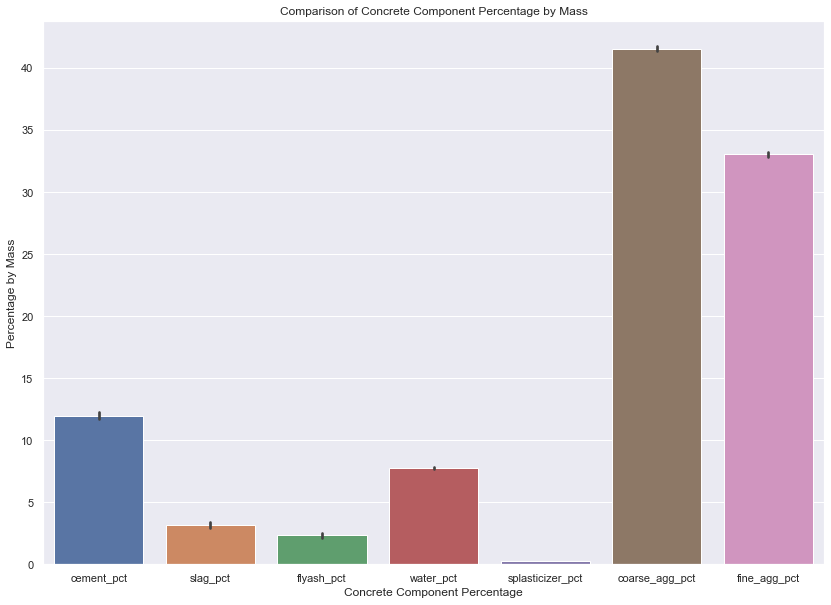

In [6]:
plt.figure(figsize=(14,10))
sns.set()
sns.barplot(data=df.iloc[:,-7:17])
plt.ylabel('Percentage by Mass')
plt.xlabel('Concrete Component Percentage')
plt.title('Comparison of Concrete Component Percentage by Mass')

Note that we used a bar plot with error bars. This is because a pie chart may be able to show the mean percentage of the components, but it cannot show the standard error of the percentage. 

## Before implementing our Linear Regression, we first check if it is valid by checking its: Linearity, Independence, Homoscedascity, & Normality

First we check if we can use multiple linear regression by calculating the VIFs of the independent variables. 

In [7]:
dfx1=df.iloc[:,0:9]
for i in range(len(dfx1.columns[:-1])):
    v=vif(np.matrix(dfx1[:-1]),i)
    print("Variance inflation factor for {}: {}".format(dfx1.columns[i],round(v,2)))

Variance inflation factor for cement: 26.21
Variance inflation factor for slag: 4.44
Variance inflation factor for flyash: 4.56
Variance inflation factor for water: 92.58
Variance inflation factor for superplasticizer: 5.52
Variance inflation factor for coarseaggregate: 85.97
Variance inflation factor for fineaggregate: 73.45
Variance inflation factor for age: 2.44


Seeing that we have VIFs higher than 5, we have problems with multi-collinearity. Thus, we try standardizing all IVs and see whether these values will be lower than 5.

In [8]:
dfx2=dfx1.copy()
dfx2.cement=(df.cement-df.cement.mean())/(df.cement.std())
dfx2.slag=(df.slag-df.slag.mean())/(df.slag.std())
dfx2.flyash=(df.flyash-df.flyash.mean())/(df.flyash.std())
dfx2.water=(df.water-df.water.mean())/(df.water.mean())
dfx2.superplasticizer=(df.superplasticizer-df.superplasticizer.mean())/(df.superplasticizer.std())
dfx2.coarseaggregate=(df.coarseaggregate-df.coarseaggregate.mean())/(df.coarseaggregate.std())
dfx2.fineaggregate=(df.fineaggregate-df.fineaggregate.mean())/(df.fineaggregate.std())
dfx2.age=(df.age-df.age.mean())/(df.age.std())

In [9]:
dfx2.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.476712,-0.856472,-0.846733,-0.107769,-0.620147,0.862735,-1.217079,-0.279597,79.99
1,2.476712,-0.856472,-0.846733,-0.107769,-0.620147,1.055651,-1.217079,-0.279597,61.89
2,0.491187,0.795140,-0.846733,0.255733,-1.038638,-0.526262,-2.239829,3.551340,40.27
3,0.491187,0.795140,-0.846733,0.255733,-1.038638,-0.526262,-2.239829,5.055221,41.05
4,-0.790075,0.678079,-0.846733,0.057459,-1.038638,0.070492,0.647569,4.976069,44.30


In [10]:
for i in range(len(dfx2.columns[:-1])):
    v=vif(np.matrix(dfx2[:-1]),i)
    print("Variance inflation factor for {}: {}".format(dfx2.columns[i],round(v,2)))

Variance inflation factor for cement: 7.6
Variance inflation factor for slag: 7.33
Variance inflation factor for flyash: 6.19
Variance inflation factor for water: 7.01
Variance inflation factor for superplasticizer: 2.97
Variance inflation factor for coarseaggregate: 5.07
Variance inflation factor for fineaggregate: 7.01
Variance inflation factor for age: 1.16


Observing that we still have VIFs > 5, we cannot use multiple linear regression because we have multicollinearity. Thus we use simple regression.

We calculate first the regression values for each DV-IV pairs. We will then use these values analyzinng the assumptions graphically.

In [11]:
dfx=df.iloc[:,0:8]
dfx=sm.add_constant(dfx)

In [12]:
df_cement = dfx[['const', 'cement']].copy()
model_cement=sm.OLS(df.csMPa,df_cement)
fitted_cement=model_cement.fit()
print(fitted_cement.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     338.7
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.32e-65
Time:                        00:26:40   Log-Likelihood:                -4214.6
No. Observations:                1030   AIC:                             8433.
Df Residuals:                    1028   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4425      1.297     10.365      0.0

In [13]:
df_slag = dfx[['const', 'slag']].copy()
model_slag=sm.OLS(df.csMPa,df_slag)
fitted_slag=model_slag.fit()
print(fitted_slag.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     19.03
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.41e-05
Time:                        00:26:40   Log-Likelihood:                -4351.8
No. Observations:                1030   AIC:                             8708.
Df Residuals:                    1028   BIC:                             8717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8888      0.680     49.868      0.0

In [14]:
df_flyash = dfx[['const', 'flyash']].copy()
model_flyash=sm.OLS(df.csMPa,df_flyash)
fitted_flyash=model_flyash.fit()
print(fitted_flyash.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.63
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           0.000675
Time:                        00:26:40   Log-Likelihood:                -4355.4
No. Observations:                1030   AIC:                             8715.
Df Residuals:                    1028   BIC:                             8725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3139      0.679     54.978      0.0

In [15]:
df_water = dfx[['const', 'water']].copy()
model_water=sm.OLS(df.csMPa,df_water)
fitted_water=model_water.fit()
print(fitted_water.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     94.13
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           2.35e-21
Time:                        00:26:40   Log-Likelihood:                -4316.1
No. Observations:                1030   AIC:                             8636.
Df Residuals:                    1028   BIC:                             8646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9583      4.270     18.025      0.0

In [16]:
df_superplasticizer = dfx[['const', 'superplasticizer']].copy()
model_superplasticizer=sm.OLS(df.csMPa,df_superplasticizer)
fitted_superplasticizer=model_superplasticizer.fit()
print(fitted_superplasticizer.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           5.13e-34
Time:                        00:26:40   Log-Likelihood:                -4287.1
No. Observations:                1030   AIC:                             8578.
Df Residuals:                    1028   BIC:                             8588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.4660      0.699  

In [17]:
df_coarseaggregate = dfx[['const', 'coarseaggregate']].copy()
model_coarseaggregate=sm.OLS(df.csMPa,df_coarseaggregate)
fitted_coarseaggregate=model_coarseaggregate.fit()
print(fitted_coarseaggregate.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     28.75
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.02e-07
Time:                        00:26:40   Log-Likelihood:                -4347.0
No. Observations:                1030   AIC:                             8698.
Df Residuals:                    1028   BIC:                             8708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              70.2951      6.451     

In [18]:
df_fineaggregate = dfx[['const', 'fineaggregate']].copy()
model_fineaggregate=sm.OLS(df.csMPa,df_fineaggregate)
fitted_fineaggregate=model_fineaggregate.fit()
print(fitted_fineaggregate.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     29.58
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           6.70e-08
Time:                        00:26:40   Log-Likelihood:                -4346.6
No. Observations:                1030   AIC:                             8697.
Df Residuals:                    1028   BIC:                             8707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.7749      4.983     12.598

In [19]:
df_age = dfx[['const', 'age']].copy()
model_age=sm.OLS(df.csMPa,df_age)
fitted_age=model_age.fit()
print(fitted_age.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           2.11e-27
Time:                        00:26:40   Log-Likelihood:                -4302.3
No. Observations:                1030   AIC:                             8609.
Df Residuals:                    1028   BIC:                             8618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8466      0.607     52.470      0.0

#### We check linearity and independence with residual plots

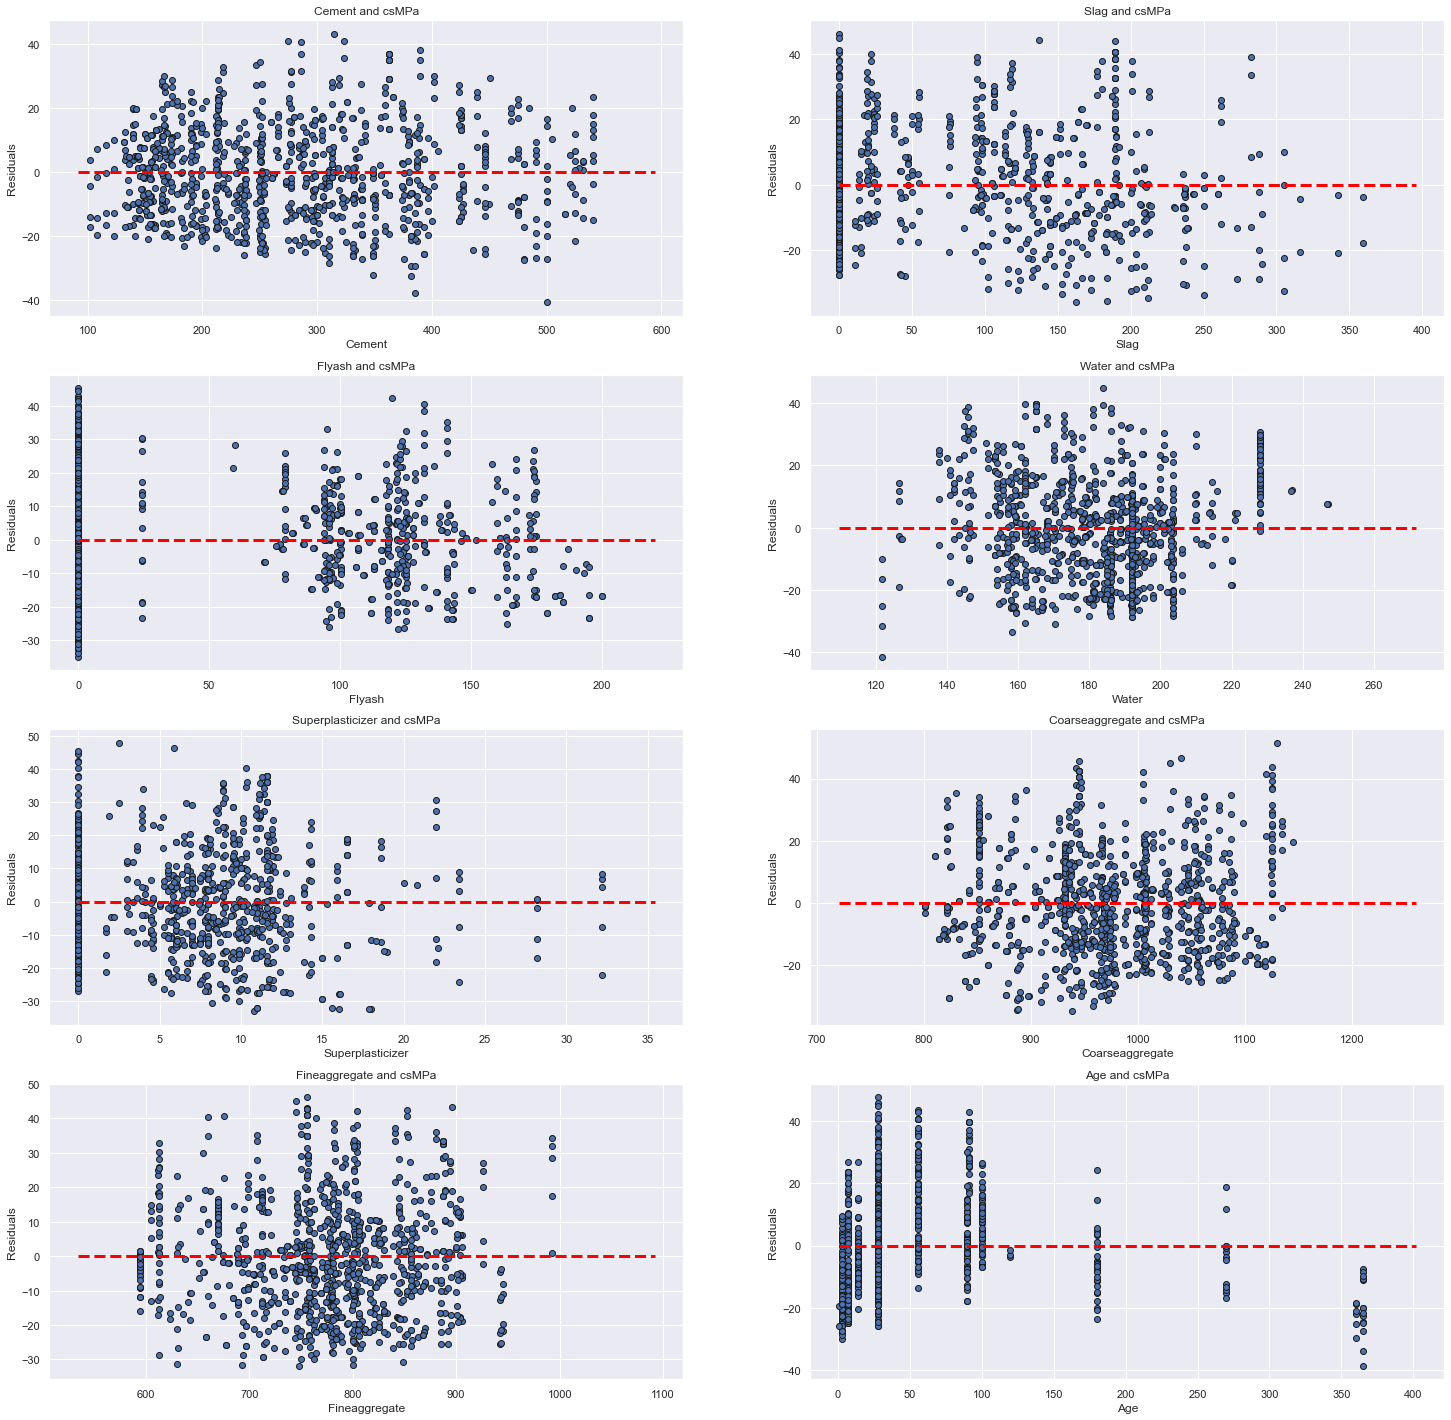

In [20]:
plt.figure(figsize=(25,25))
sns.set()

plt.subplot(421)
p=plt.scatter(x=df.cement,y=fitted_cement.resid,edgecolor='k')
xmin=min(df.cement)
xmax = max(df.cement)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Cement")
plt.ylabel("Residuals")
plt.title("Cement and csMPa")
plt.grid(True)

plt.subplot(422)
p=plt.scatter(x=df.slag,y=fitted_slag.resid,edgecolor='k')
xmin=min(df.slag)
xmax = max(df.slag)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Slag")
plt.ylabel("Residuals")
plt.title("Slag and csMPa")
plt.grid(True)

plt.subplot(423)
p=plt.scatter(x=df.flyash,y=fitted_flyash.resid,edgecolor='k')
xmin=min(df.flyash)
xmax = max(df.flyash)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Flyash")
plt.ylabel("Residuals")
plt.title("Flyash and csMPa")
plt.grid(True)

plt.subplot(424)
p=plt.scatter(x=df.water,y=fitted_water.resid,edgecolor='k')
xmin=min(df.water)
xmax = max(df.water)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Water")
plt.ylabel("Residuals")
plt.title("Water and csMPa")
plt.grid(True)

plt.subplot(425)
p=plt.scatter(x=df.superplasticizer,y=fitted_superplasticizer.resid,edgecolor='k')
xmin=min(df.superplasticizer)
xmax = max(df.superplasticizer)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Superplasticizer")
plt.ylabel("Residuals")
plt.title("Superplasticizer and csMPa")
plt.grid(True)

plt.subplot(426)
p=plt.scatter(x=df.coarseaggregate,y=fitted_coarseaggregate.resid,edgecolor='k')
xmin=min(df.coarseaggregate)
xmax = max(df.coarseaggregate)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Coarseaggregate")
plt.ylabel("Residuals")
plt.title("Coarseaggregate and csMPa")
plt.grid(True)

plt.subplot(427)
p=plt.scatter(x=df.fineaggregate,y=fitted_fineaggregate.resid,edgecolor='k')
xmin=min(df.fineaggregate)
xmax = max(df.fineaggregate)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fineaggregate")
plt.ylabel("Residuals")
plt.title("Fineaggregate and csMPa")
plt.grid(True)

plt.subplot(428)
p=plt.scatter(x=df.age,y=fitted_age.resid,edgecolor='k')
xmin=min(df.age)
xmax = max(df.age)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Age and csMPa")
plt.grid(True)

plt.show()

Seeing that no patterns are formed and random distribution within the centerline, albeit with some clustering, our assumptions for linearity and independence are valid 

#### Now we check our homoscedasticity assumption with residuals vs fitted plots

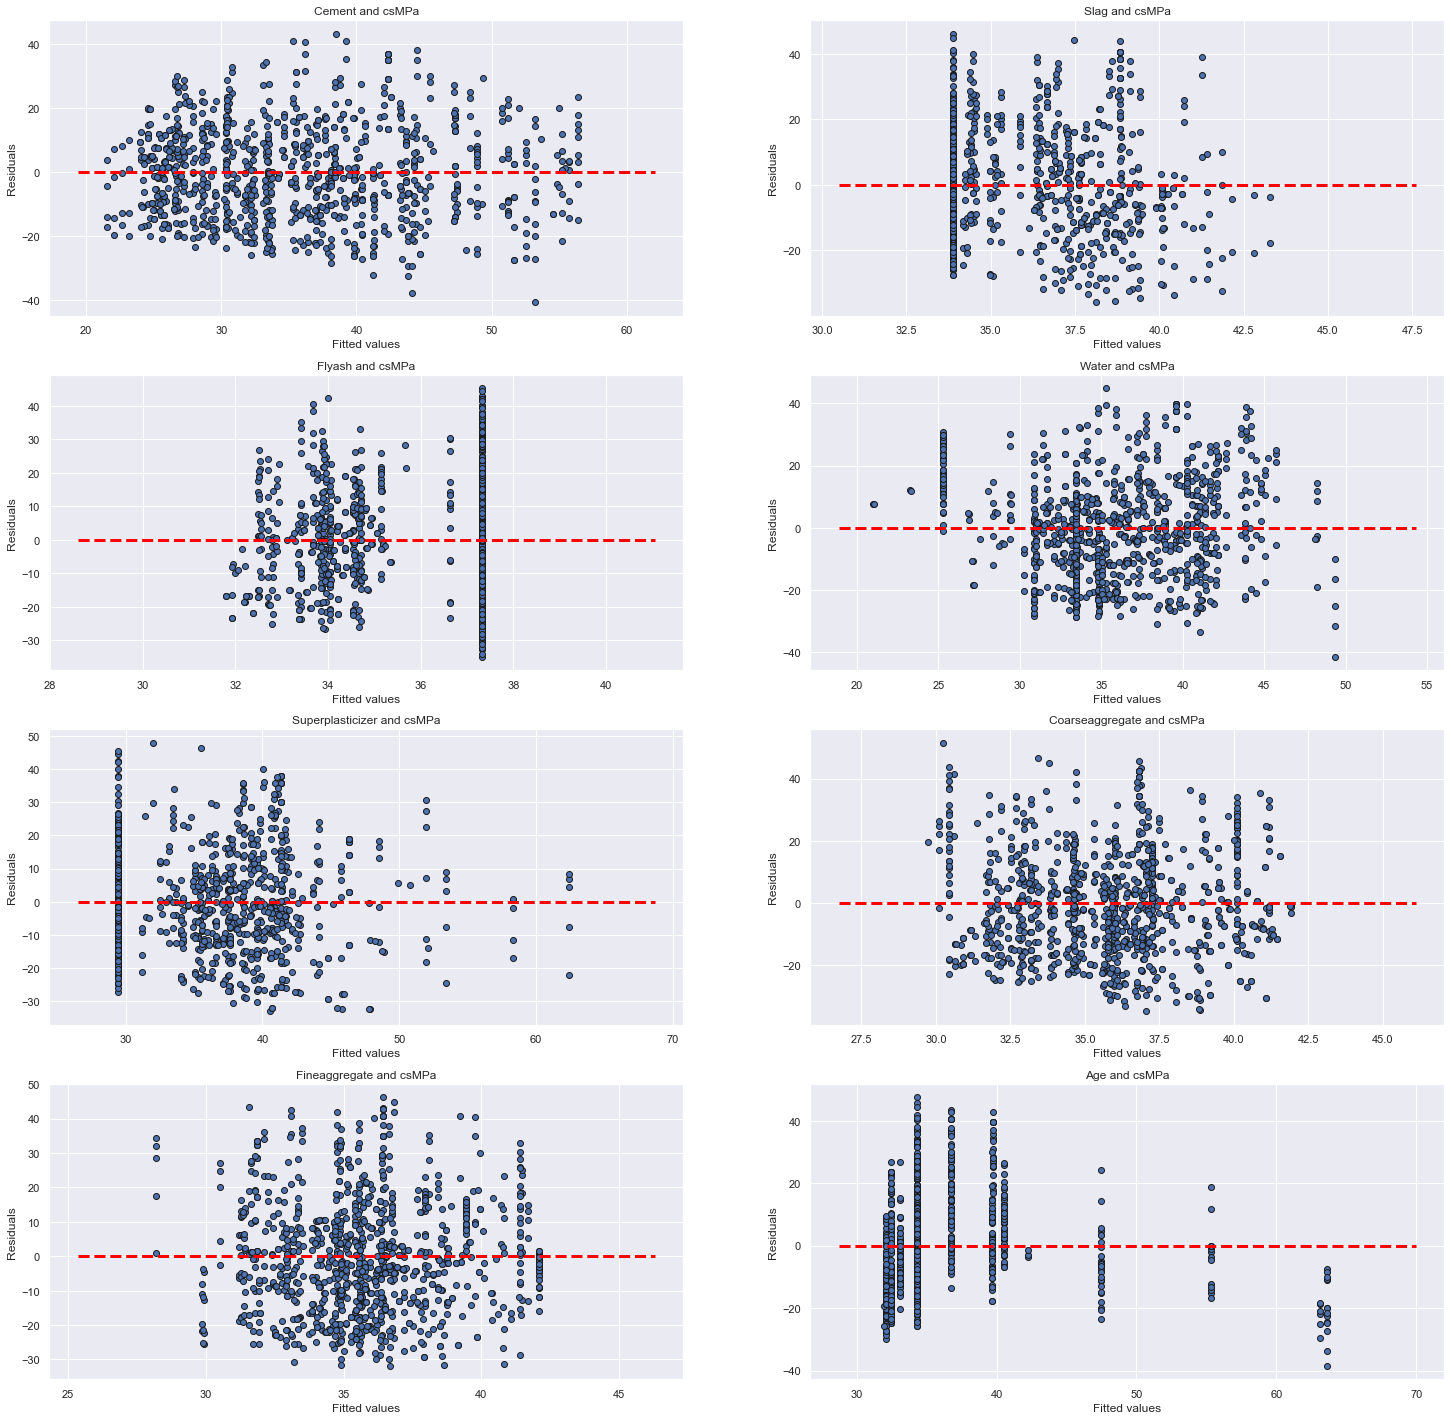

In [21]:
plt.figure(figsize=(25,25))
sns.set()

plt.subplot(421)
p=plt.scatter(x=fitted_cement.fittedvalues,y=fitted_cement.resid,edgecolor='k')
xmin=min(fitted_cement.fittedvalues)
xmax = max(fitted_cement.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Cement and csMPa")
plt.grid(True)

plt.subplot(422)
p=plt.scatter(x=fitted_slag.fittedvalues,y=fitted_slag.resid,edgecolor='k')
xmin=min(fitted_slag.fittedvalues)
xmax = max(fitted_slag.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Slag and csMPa")
plt.grid(True)

plt.subplot(423)
p=plt.scatter(x=fitted_flyash.fittedvalues,y=fitted_flyash.resid,edgecolor='k')
xmin=min(fitted_flyash.fittedvalues)
xmax = max(fitted_flyash.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Flyash and csMPa")
plt.grid(True)

plt.subplot(424)
p=plt.scatter(x=fitted_water.fittedvalues,y=fitted_water.resid,edgecolor='k')
xmin=min(fitted_water.fittedvalues)
xmax = max(fitted_water.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Water and csMPa")
plt.grid(True)

plt.subplot(425)
p=plt.scatter(x=fitted_superplasticizer.fittedvalues,y=fitted_superplasticizer.resid,edgecolor='k')
xmin=min(fitted_superplasticizer.fittedvalues)
xmax = max(fitted_superplasticizer.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Superplasticizer and csMPa")
plt.grid(True)

plt.subplot(426)
p=plt.scatter(x=fitted_coarseaggregate.fittedvalues,y=fitted_coarseaggregate.resid,edgecolor='k')
xmin=min(fitted_coarseaggregate.fittedvalues)
xmax = max(fitted_coarseaggregate.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Coarseaggregate and csMPa")
plt.grid(True)

plt.subplot(427)
p=plt.scatter(x=fitted_fineaggregate.fittedvalues,y=fitted_fineaggregate.resid,edgecolor='k')
xmin=min(fitted_fineaggregate.fittedvalues)
xmax = max(fitted_fineaggregate.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Fineaggregate and csMPa")
plt.grid(True)

plt.subplot(428)
p=plt.scatter(x=fitted_age.fittedvalues,y=fitted_age.resid,edgecolor='k')
xmin=min(fitted_age.fittedvalues)
xmax = max(fitted_age.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Age and csMPa")
plt.grid(True)

plt.show()

Since all plots are approximately square. Our homoscedasticity assumption is valid

#### For our last diagnostic, we check if the residuals are normally distributed

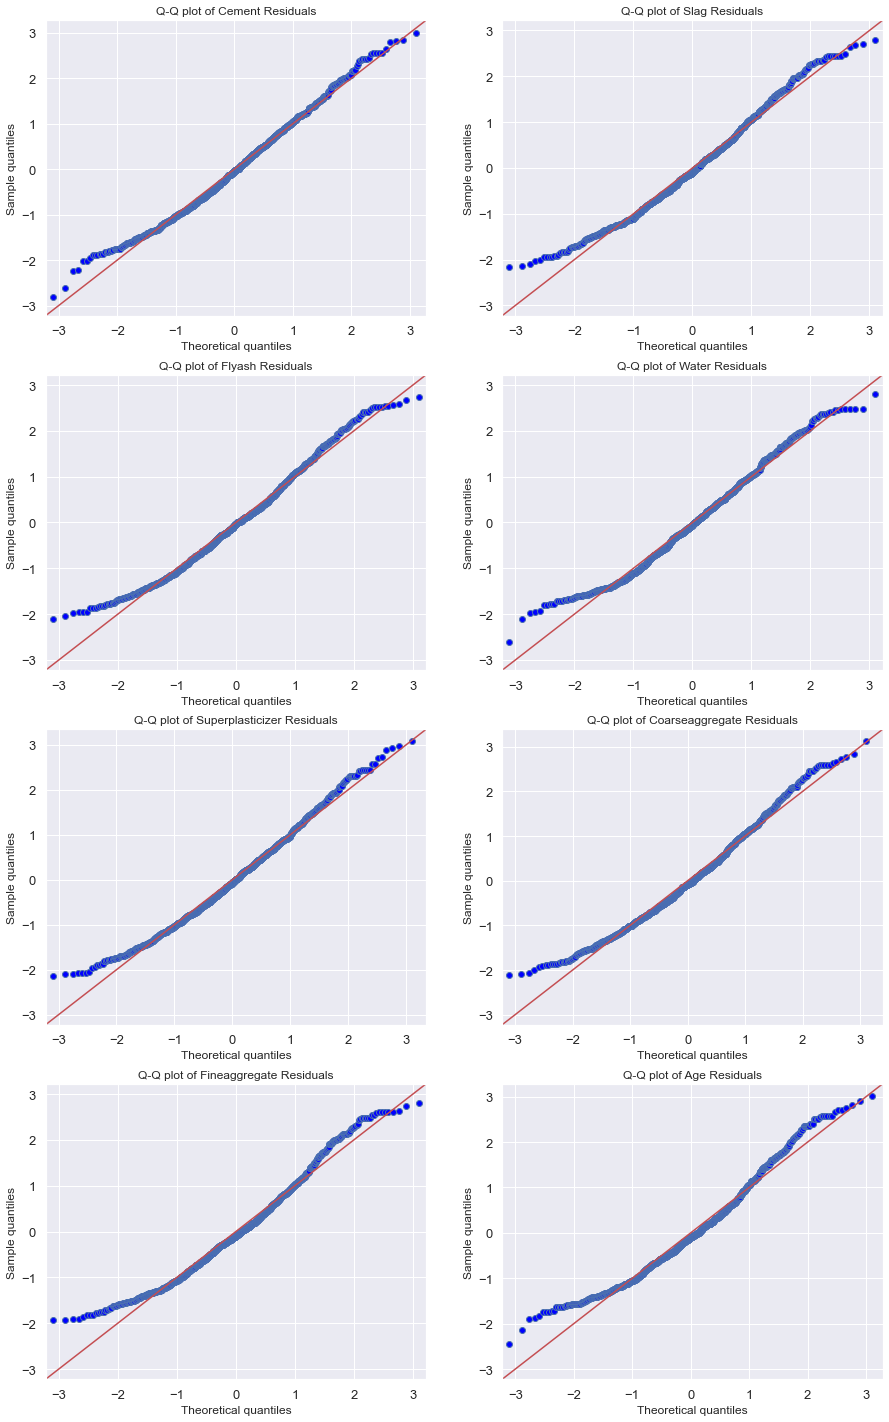

In [22]:
fig=plt.figure(figsize=(15,25))

sm.qqplot(fitted_cement.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 1))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Cement Residuals")



fig=sm.qqplot(fitted_slag.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 2))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Slag Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_flyash.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 3))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Flyash Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_water.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 4))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Water Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_superplasticizer.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 5))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Superplasticizer Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_coarseaggregate.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 6))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Coarseaggregate Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_fineaggregate.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 7))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Fineaggregate Residuals")
plt.grid(True)


fig=sm.qqplot(fitted_age.resid,line='45',fit=True,ax=fig.add_subplot(4, 2, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of Age Residuals")
plt.grid(True)


plt.show()

Seeing that all residuals approximately fit our normal line, our normality assumption is valid. 


Now that we have checked that the four assumptions for simple linear regression are valid, we proceed to regression plotting

## Plot a regression plot for each component (including age) vs. csMPa (compressive strength)

In [23]:
cement_slope, cement_intercept, cement_r_value, cement_p_value, cement_std_err=sp.stats.linregress(x=df.cement,y=df.csMPa)
slag_slope, slag_intercept, slag_r_value, slag_p_value, slag_std_err = sp.stats.linregress(x=df.slag,y=df.csMPa)
flyash_slope, flyash_intercept, flyash_r_value, flyash_p_value, flyash_std_err = sp.stats.linregress(x=df.flyash,y=df.csMPa)
water_slope, water_intercept, water_r_value, water_p_value, water_std_err = sp.stats.linregress(x=df.water,y=df.csMPa)
splasticizer_slope, splasticizer_intercept, splasticizer_r_value, splasticizer_p_value, splasticizer_std_err = sp.stats.linregress(x=df.superplasticizer,y=df.csMPa)
cagg_slope, cagg_intercept, cagg_r_value, cagg_p_value, cagg_std_err = sp.stats.linregress(x=df.coarseaggregate,y=df.csMPa)
fagg_slope, fagg_intercept, fagg_r_value, fagg_p_value, fagg_std_err = sp.stats.linregress(x=df.fineaggregate,y=df.csMPa)
age_slope, age_intercept, age_r_value, age_p_value, age_std_err = sp.stats.linregress(x=df.age,y=df.csMPa)

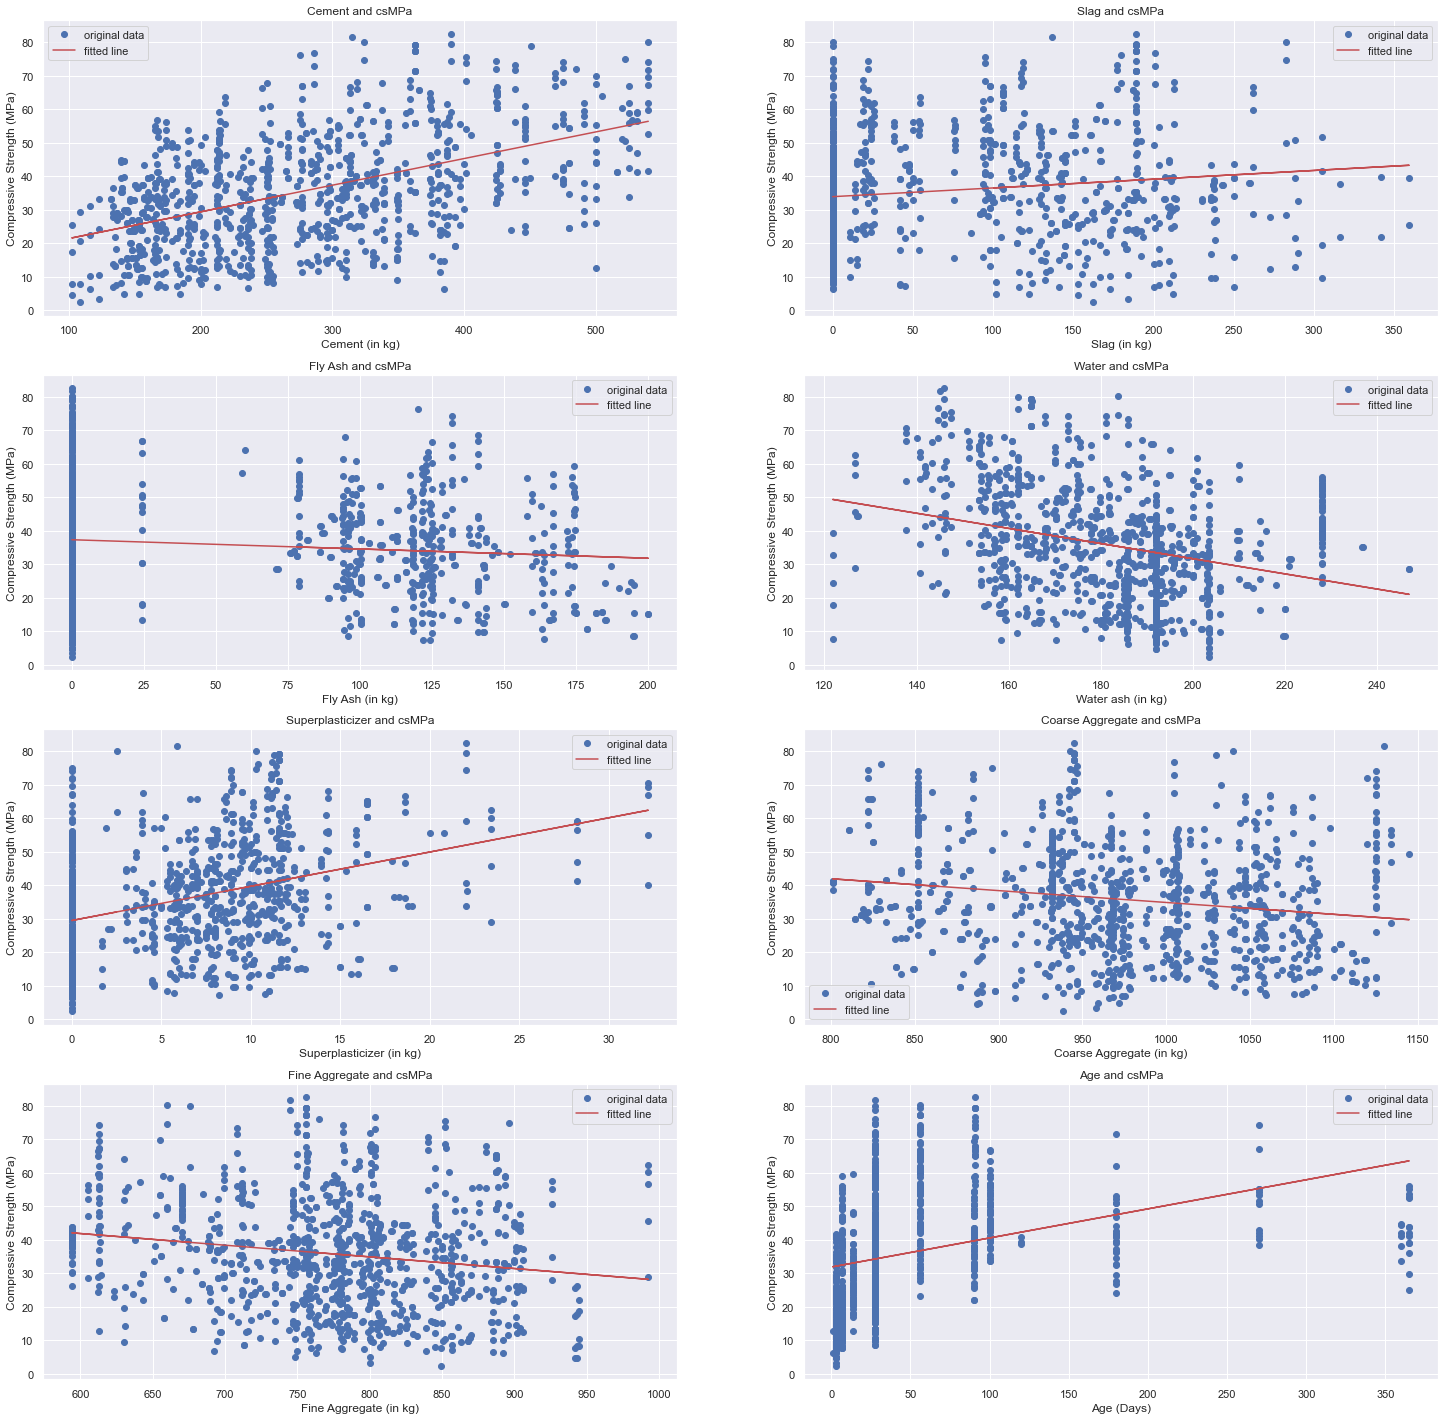

In [24]:
plt.figure(figsize=(25,25))
sns.set()
plt.subplot(421)
plt.plot(df.cement, df.csMPa, 'o', label='original data')
plt.plot(df.cement, cement_intercept + cement_slope*df.cement, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Cement (in kg)')
plt.title('Cement and csMPa')

plt.subplot(422)
plt.plot(df.slag, df.csMPa, 'o', label='original data')
plt.plot(df.slag, slag_intercept + slag_slope*df.slag, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Slag (in kg)')
plt.title('Slag and csMPa')

plt.subplot(423)
plt.plot(df.flyash, df.csMPa, 'o', label='original data')
plt.plot(df.flyash, flyash_intercept + flyash_slope*df.flyash, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Fly Ash (in kg)')
plt.title('Fly Ash and csMPa')


plt.subplot(424)
plt.plot(df.water, df.csMPa, 'o', label='original data')
plt.plot(df.water, water_intercept + water_slope*df.water, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Water ash (in kg)')
plt.title('Water and csMPa')


plt.subplot(425)
plt.plot(df.superplasticizer, df.csMPa, 'o', label='original data')
plt.plot(df.superplasticizer, splasticizer_intercept + splasticizer_slope*df.superplasticizer, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Superplasticizer (in kg)')
plt.title('Superplasticizer and csMPa')


plt.subplot(426)
plt.plot(df.coarseaggregate, df.csMPa, 'o', label='original data')
plt.plot(df.coarseaggregate, cagg_intercept + cagg_slope*df.coarseaggregate, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Coarse Aggregate (in kg)')
plt.title('Coarse Aggregate and csMPa')


plt.subplot(427)
plt.plot(df.fineaggregate, df.csMPa, 'o', label='original data')
plt.plot(df.fineaggregate, fagg_intercept + fagg_slope*df.fineaggregate, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Fine Aggregate (in kg)')
plt.title('Fine Aggregate and csMPa')

plt.subplot(428)
plt.plot(df.age, df.csMPa, 'o', label='original data')
plt.plot(df.age, age_intercept + age_slope*df.age, 'r', label='fitted line')
plt.legend()
plt.ylabel('Compressive Strength (MPa)')
plt.xlabel('Age (Days)')
plt.title('Age and csMPa')
##END cement component vs csMPa

plt.show()

## Create Dataframe for Linear Regression Summary

In [25]:
linreg_val= {'Ingredient':  ['Cement', 'Slag','Flyash','Water','Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age'],
        'Slope': [cement_slope, slag_slope, flyash_slope, water_slope, splasticizer_slope, cagg_slope, fagg_slope, age_slope],
        'Intercept': [cement_intercept, slag_intercept, flyash_intercept, water_intercept, splasticizer_intercept, cagg_intercept, fagg_intercept, age_intercept],
        'R_Value': [cement_r_value,  slag_r_value,  flyash_r_value, water_r_value,  splasticizer_r_value,  cagg_r_value,  fagg_r_value,  age_r_value],
        'R^2_Value': [cement_r_value**2,  slag_r_value**2,  flyash_r_value**2, water_r_value**2,  splasticizer_r_value**2,  cagg_r_value**2,  fagg_r_value**2,  age_r_value**2],     
        'P_Value': [cement_p_value,  slag_p_value,  flyash_p_value,  water_p_value,  splasticizer_p_value,  cagg_p_value,  fagg_p_value, age_p_value,],
        'Std_Error': [ cement_std_err,  slag_std_err,  flyash_std_err,  water_std_err,  splasticizer_std_err,  cagg_std_err,  fagg_std_err,  age_std_err ],
        }

linreg_df=pd.DataFrame(linreg_val)

In [26]:
linreg_df

,Ingredient,Slope,Intercept,R_Value,R^2_Value,P_Value,Std_Error
0,Cement,0.079580,13.442528,0.497832,0.247837,1.324183e-65,0.004324
1,Slag,0.026106,33.888824,0.134829,0.018179,1.413567e-05,0.005984
2,Flyash,-0.027606,37.313896,-0.105755,0.011184,6.751584e-04,0.008096
3,Water,-0.226585,76.958341,-0.289633,0.083887,2.350655e-21,0.023354
4,Superplasticizer,1.023733,29.466046,0.366079,0.134014,5.131485e-34,0.081165
5,Coarse Aggregate,-0.035437,70.295142,-0.164935,0.027203,1.018351e-07,0.006609
6,Fine Aggregate,-0.034847,62.774889,-0.167241,0.027970,6.704114e-08,0.006407
7,Age,0.086973,31.846595,0.328873,0.108157,2.106341e-27,0.007789
